# Erblin Marku
# Msc Computer Science 
# Queen Mary University of London
# Data Academy 2022 project

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from termcolor import colored

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline

from collections import Counter


In [2]:
#install catboost
!pip install catboost

In [3]:
# we need feature_engine library for categorical encoding
!pip install feature_engine
from feature_engine import encoding as ce

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.shape

(41188, 21)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Lets rename some columns first, put every point seperator as an underscore

In [9]:
df = df.rename(columns = {'emp.var.rate' : 'emp_var_rate', 'cons.price.idx' : 'cons_price_idx', 
                          'cons.conf.idx' : 'cons_conf_idx', 'nr.employed' : 'nr_employed'})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.isna().sum()
#we have no null data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Lets check if the dataset is balanced

In [11]:
(df['y'].value_counts() / len(df))

no     0.887346
yes    0.112654
Name: y, dtype: float64

### Looks like our dataset is imbalanced so we have to deal with it carefully

### Lets see the description of the df data

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### We see some problems in the std in duration, pdays. meaning the data there is distributed far away from the mean, so we need to take a look at it carefully

<AxesSubplot:>

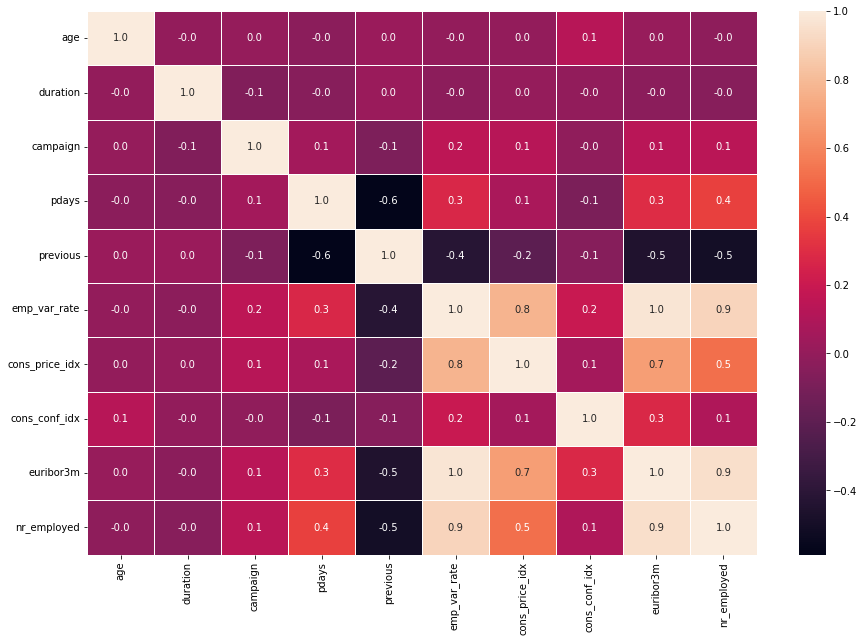

In [13]:
#correlation map to see if we have correlating features
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### It looks like we have correlation between euribor3m-emp_var_rate,euribor3m-nr_employed, nr_employed-emp_var_rate,cons_price_rate-emp_var_rate.
### We will need to decide which one to drop, for now it looks like emp_var_state needs to be droped and maybe the euribor3m.
### We will decide after the visualization

# Visualization of the data

### Client data 

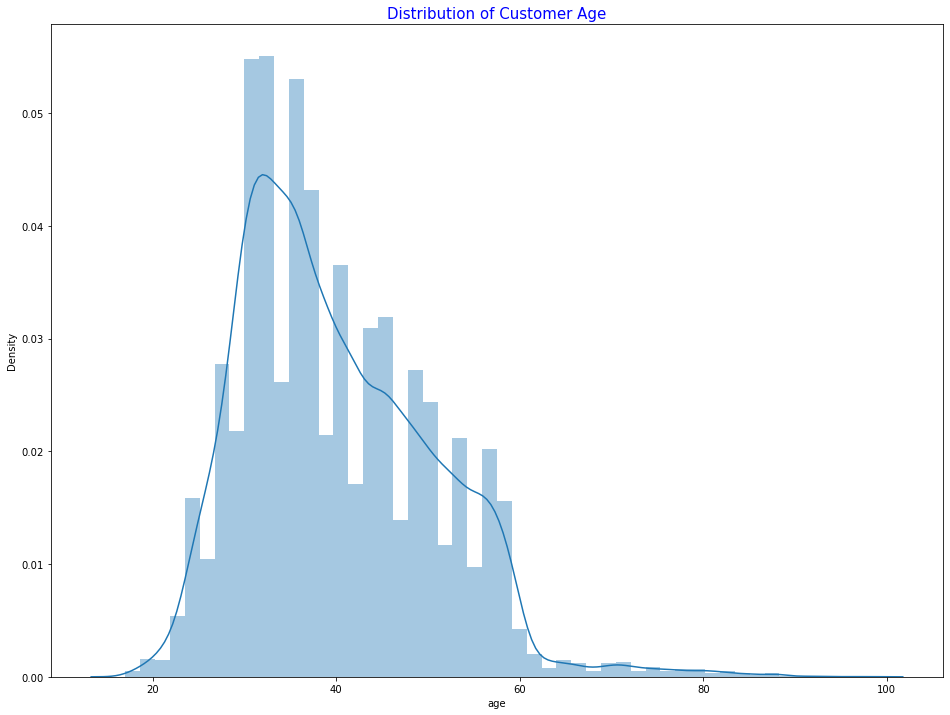

In [14]:
#distribution of customer age
plt.figure(figsize = (16,12))
sns.distplot(df['age'])
plt.title("Distribution of Customer Age", fontsize = 15, color = 'b')
plt.show()

### We have a very large amount of different ages, we may need to change this column into categories of age for better function in the algorithm

## Lets plot numerical values to get an insight on outliners.

In [15]:
# create lists of numerical and categorical variables
catg_vars = [var for var in df.columns if var != 'y' and df[var].dtype=='O']
num_vars = [var for var in df.columns if var != 'y' and var not in catg_vars]

print('Number of categorical variables: {}'.format(len(catg_vars)))
print('Number of numerical variables: {}'.format(len(num_vars)))

Number of categorical variables: 10
Number of numerical variables: 10


In [16]:
def plot_num_values(df, var):
    plt.figure(figsize=(40,10))
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')
    plt.xlabel(var)
    plt.show()

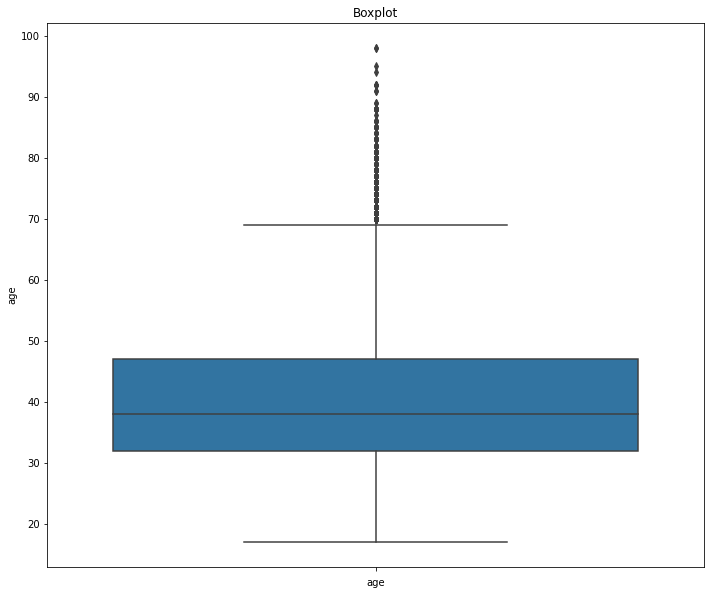

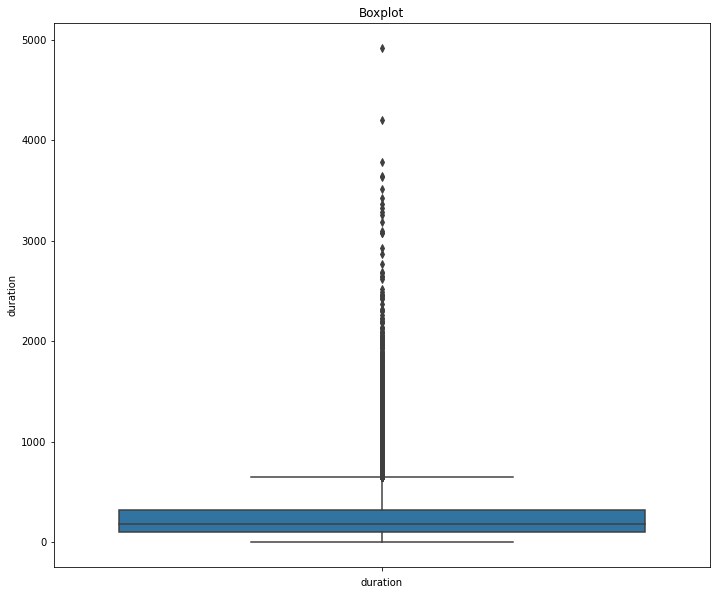

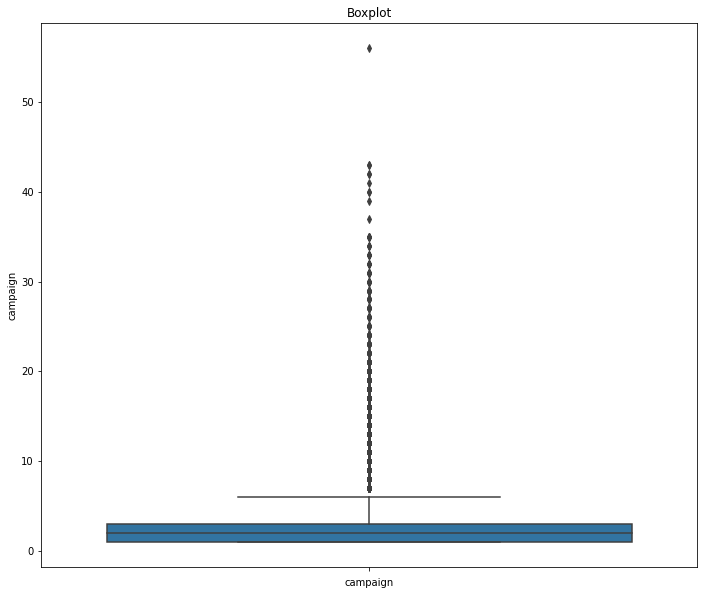

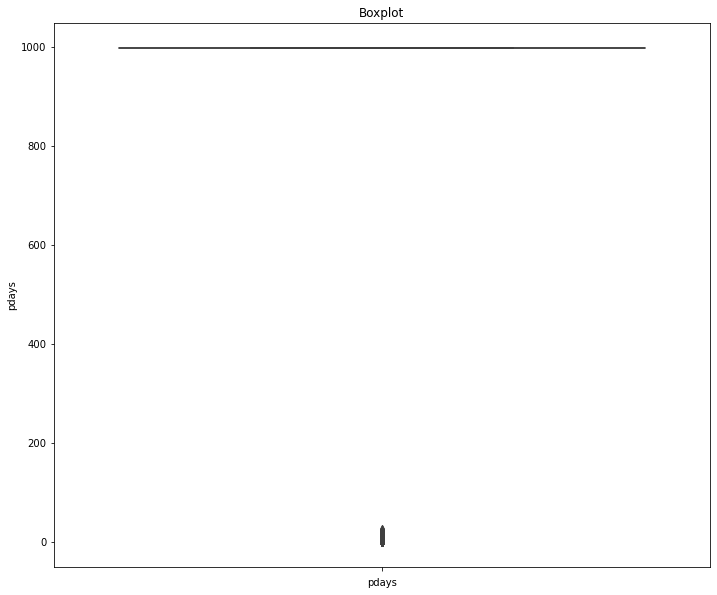

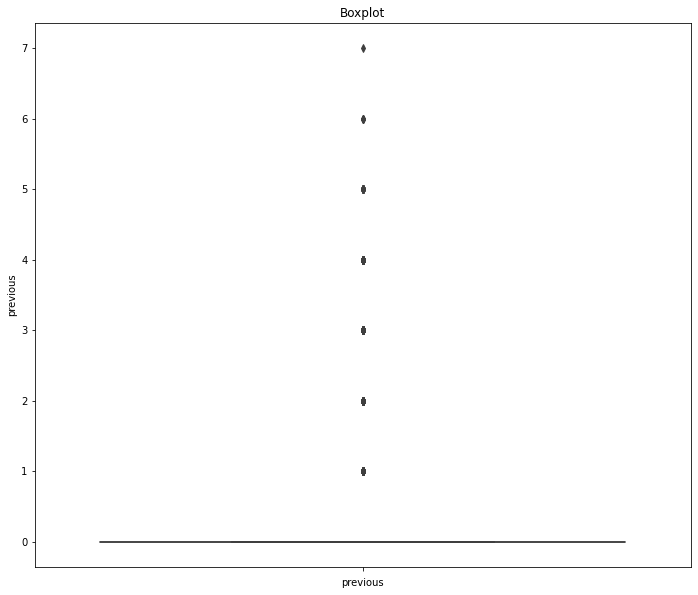

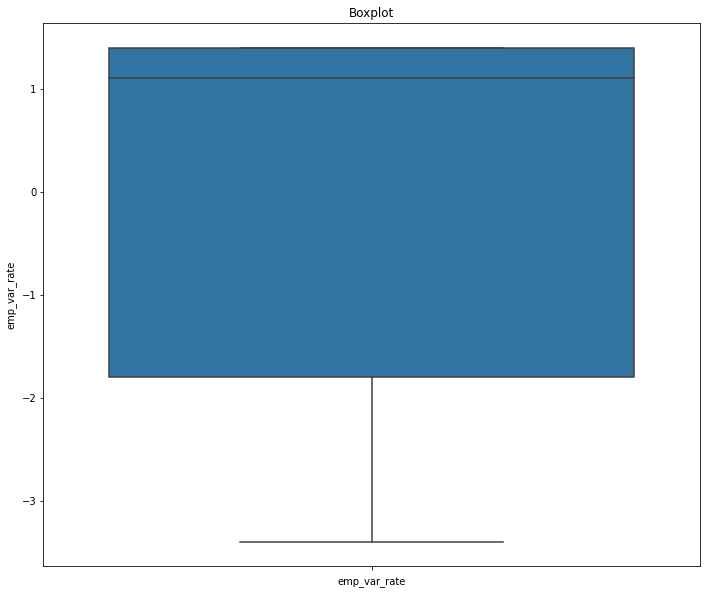

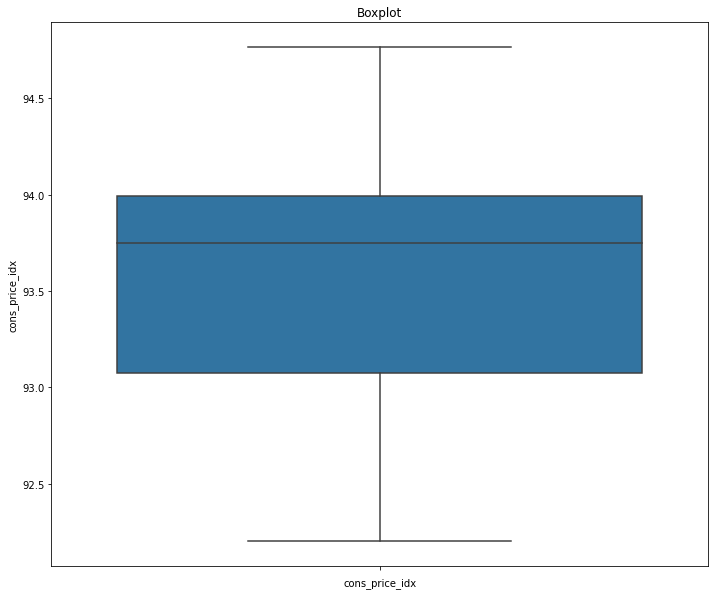

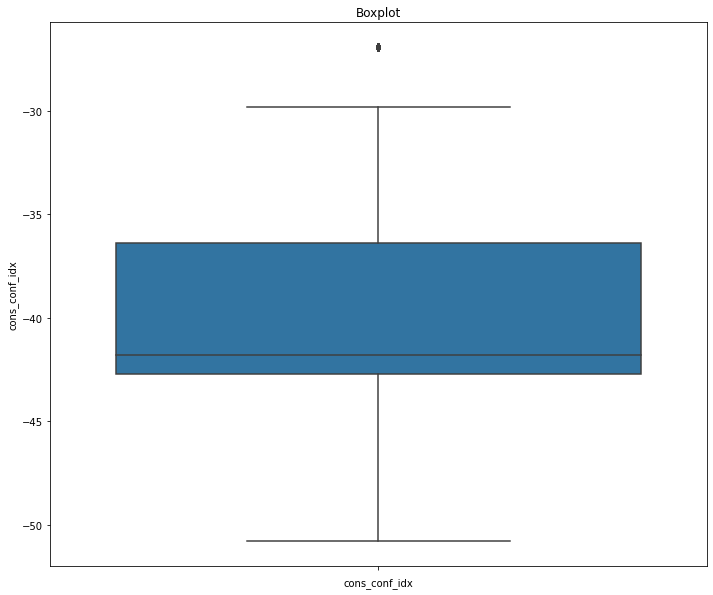

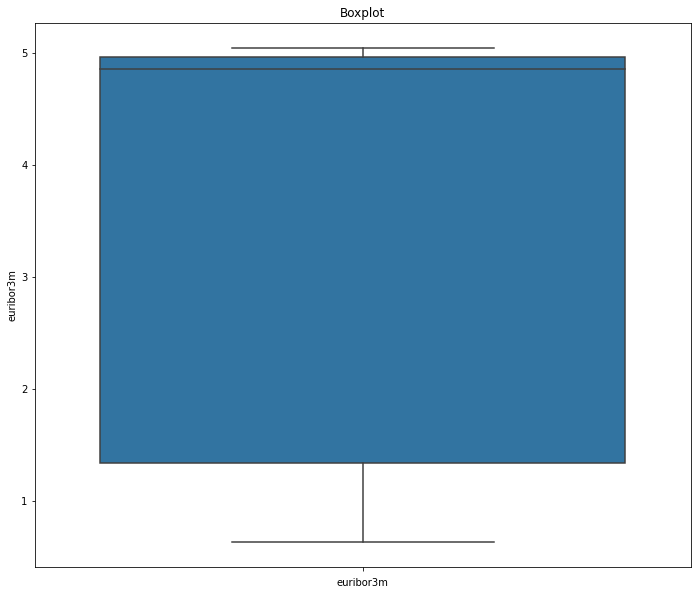

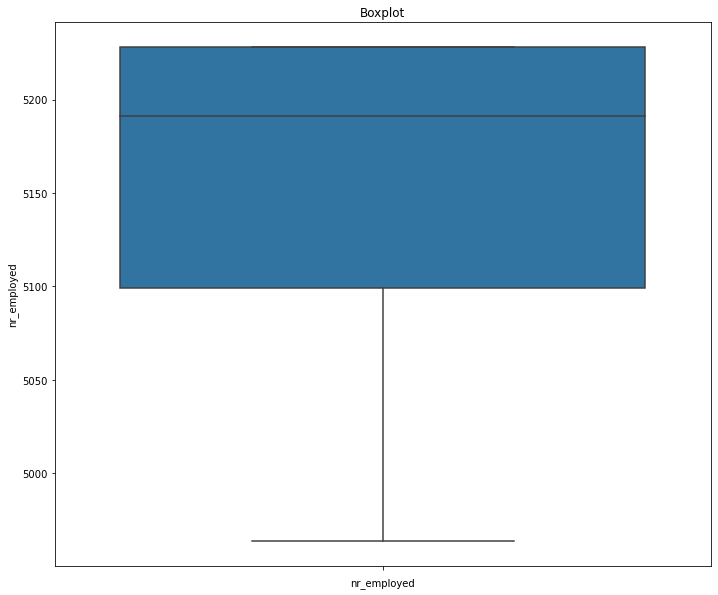

In [17]:
for var in num_vars:
    plot_num_values(df, var)

### Outliners spoted after age of 68, so we need to remove them later
### Also values for duration over 4800 and campain over 35

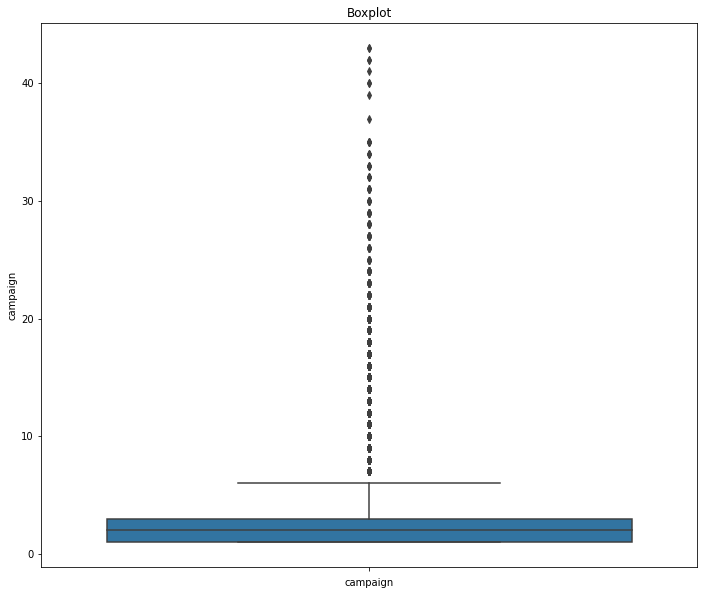

In [18]:
df = df[df['campaign']<50]
plot_num_values(df, 'campaign')
#looks better

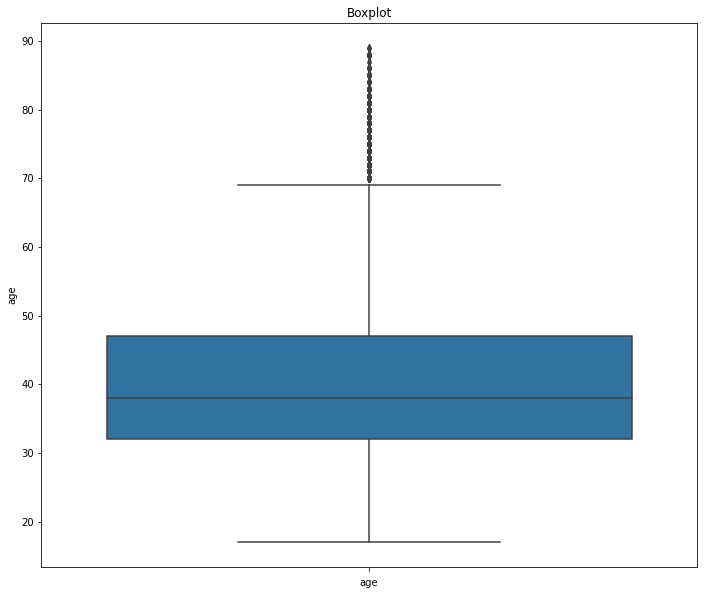

In [19]:
df = df[df['age']<90]
plot_num_values(df, 'age')
#looks better

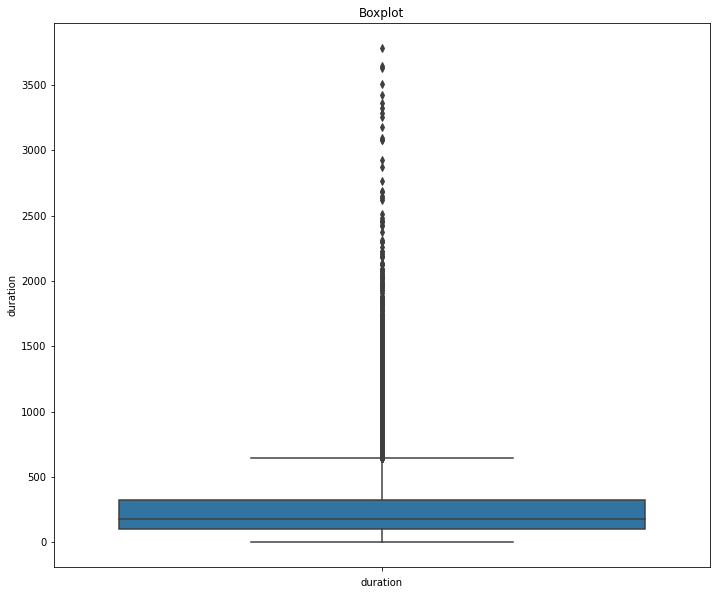

In [20]:
df = df[df['duration']<3800]
plot_num_values(df, 'duration')
#looks better

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


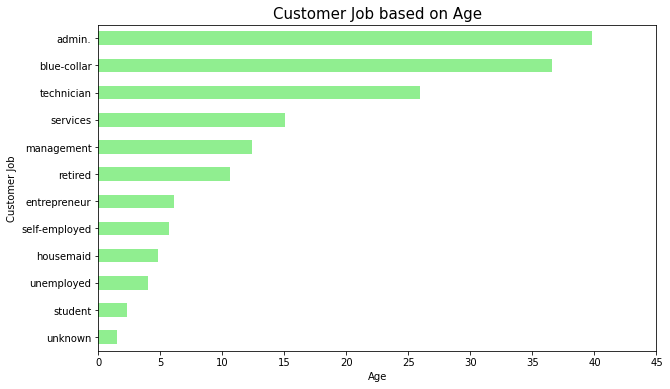

In [22]:
#visualize of the customer job based on age
plt.figure(figsize = (10,6))
df.groupby('job')['age'].sum().sort_values(ascending = True).plot(kind = 'barh', color = 'lightgreen')
plt.title('Customer Job based on Age', fontsize = 15, color = 'black')
plt.xlabel('Age')
plt.ylabel('Customer Job')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/10000).astype(int))
plt.show()

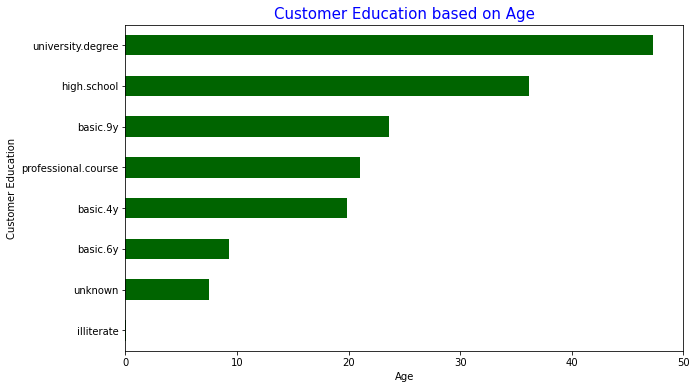

In [23]:
#visualize of the customer education based on age
plt.figure(figsize = (10,6))
df.groupby('education')['age'].sum().sort_values(ascending = True).plot(kind = 'barh', color = 'darkgreen')
plt.title('Customer Education based on Age', fontsize = 15, color = 'blue')
plt.xlabel('Age')
plt.ylabel('Customer Education')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/10000).astype(int))
plt.show()

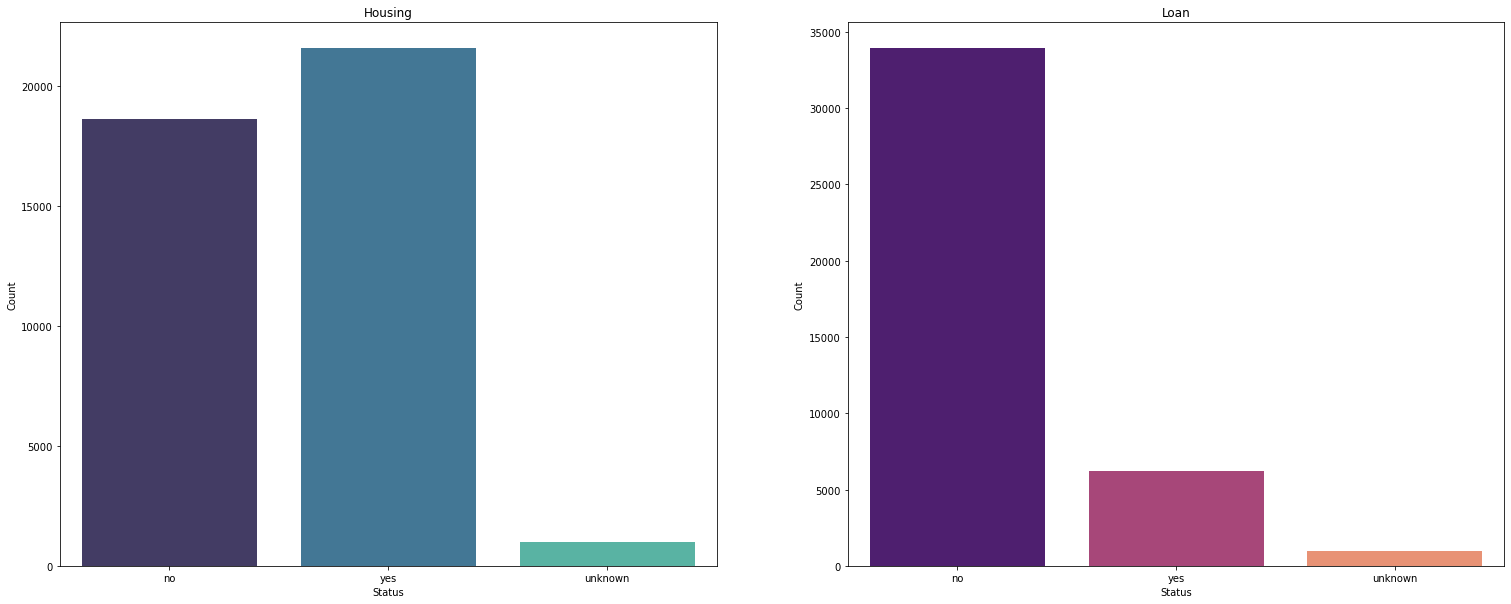

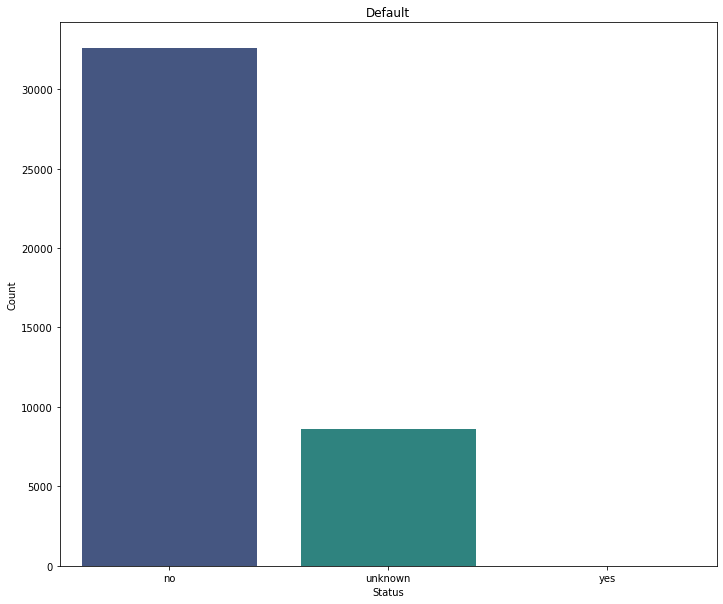

In [69]:
#visualize of customer housing status 
plt.rcParams['figure.figsize'] = (40,10)
plt.subplot(1, 3, 1)
sns.countplot(df['housing'], palette = 'mako')
plt.title('Housing', color = 'black')
plt.xlabel('Status')
plt.ylabel('Count')

#visualize of customer loan status based on age
plt.subplot(1, 3, 2)
sns.countplot(df['loan'], palette = 'magma')
plt.title('Loan', color = 'black')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

#visualize of customer credit status based on age
plt.subplot(1, 3, 3)
sns.countplot(df['default'], palette = 'viridis')
plt.title('Default', color = 'black')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

### Last contact 

<Figure size 1440x720 with 0 Axes>

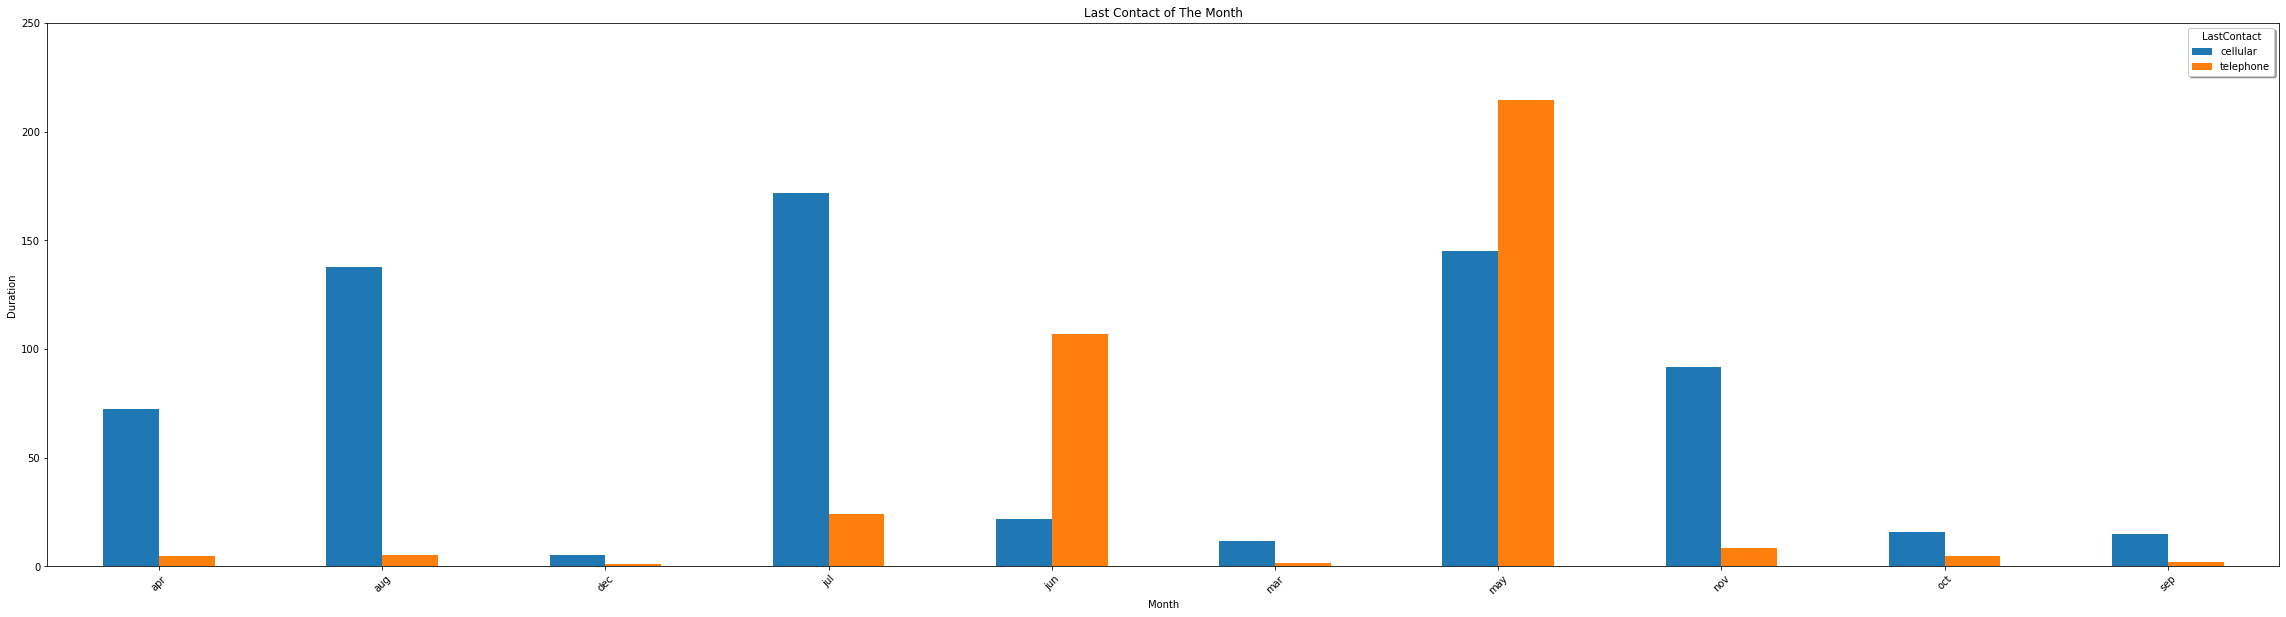

In [25]:
#visualize of last contact duration of the month
plt.figure(figsize = (20,10))
df.groupby(['month','contact'])['duration'].sum().unstack().plot(kind = 'bar')
plt.title('Last Contact of The Month', color = 'black')
plt.xlabel('Month')
plt.ylabel('Duration')
plt.legend(bbox_to_anchor = (1,1), shadow = True, title = 'LastContact')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000).astype(int))
plt.xticks(rotation = 45)
plt.show()

<Figure size 720x432 with 0 Axes>

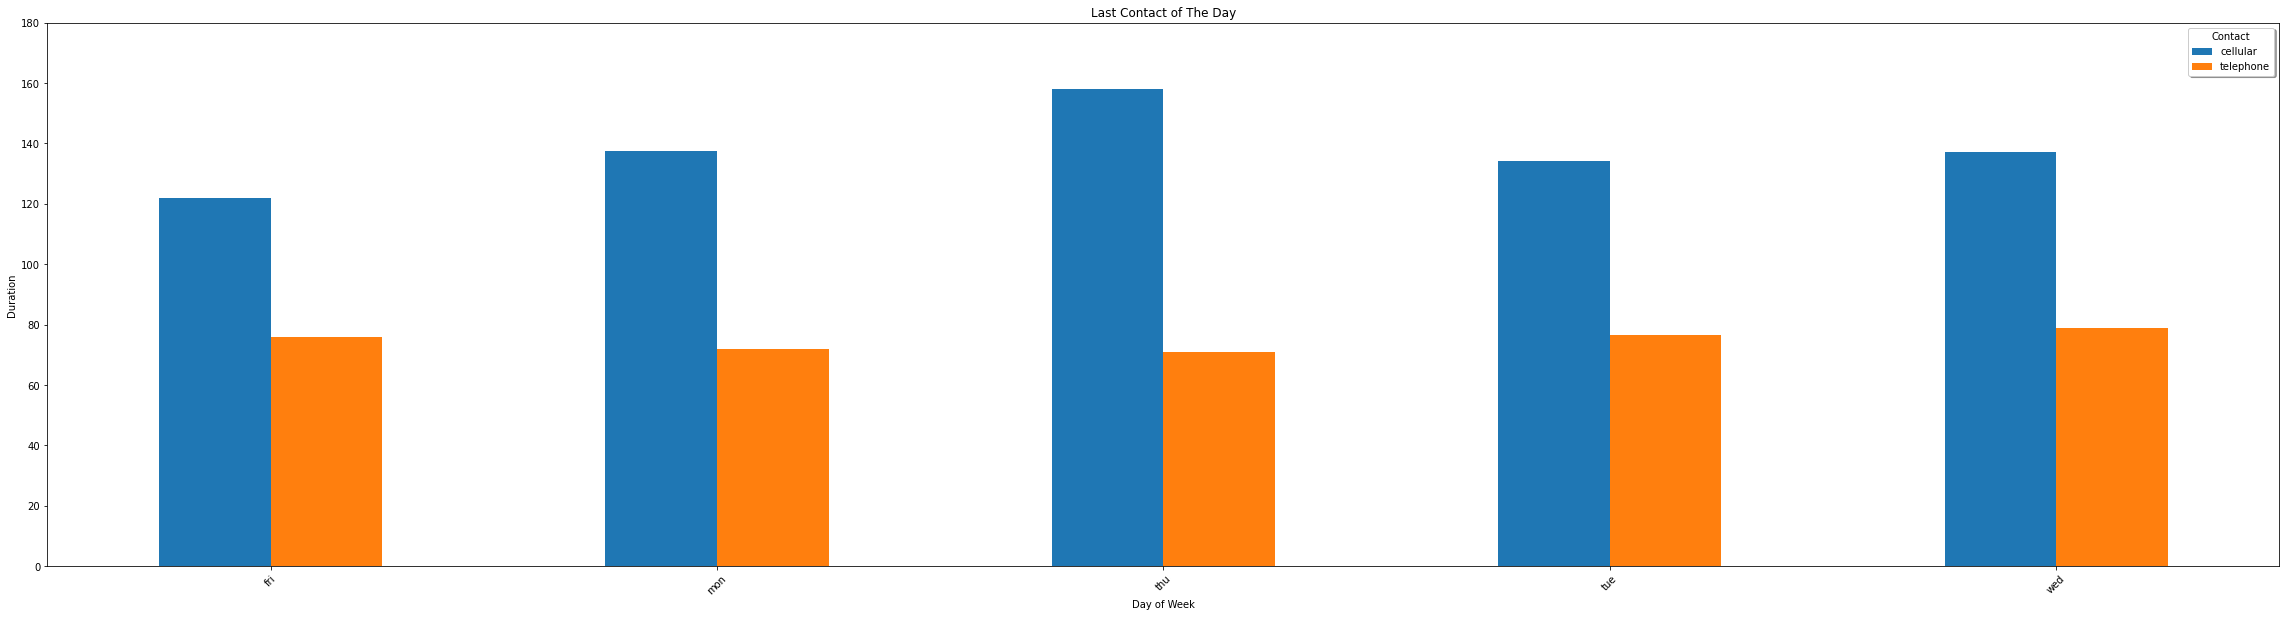

In [26]:
#visualize of last contact duration of the day
plt.figure(figsize = (10,6))
df.groupby(['day_of_week','contact'])['duration'].sum().unstack().plot(kind = 'bar')
plt.title('Last Contact of The Day', color = 'black')
plt.xlabel('Day of Week')
plt.ylabel('Duration')
plt.legend(bbox_to_anchor = (1,1), shadow = True, title = 'Contact')
labels, locations = plt.yticks()
plt.yticks(labels, (labels/10000).astype(int))
plt.xticks(rotation = 45)
plt.show()

## Other data

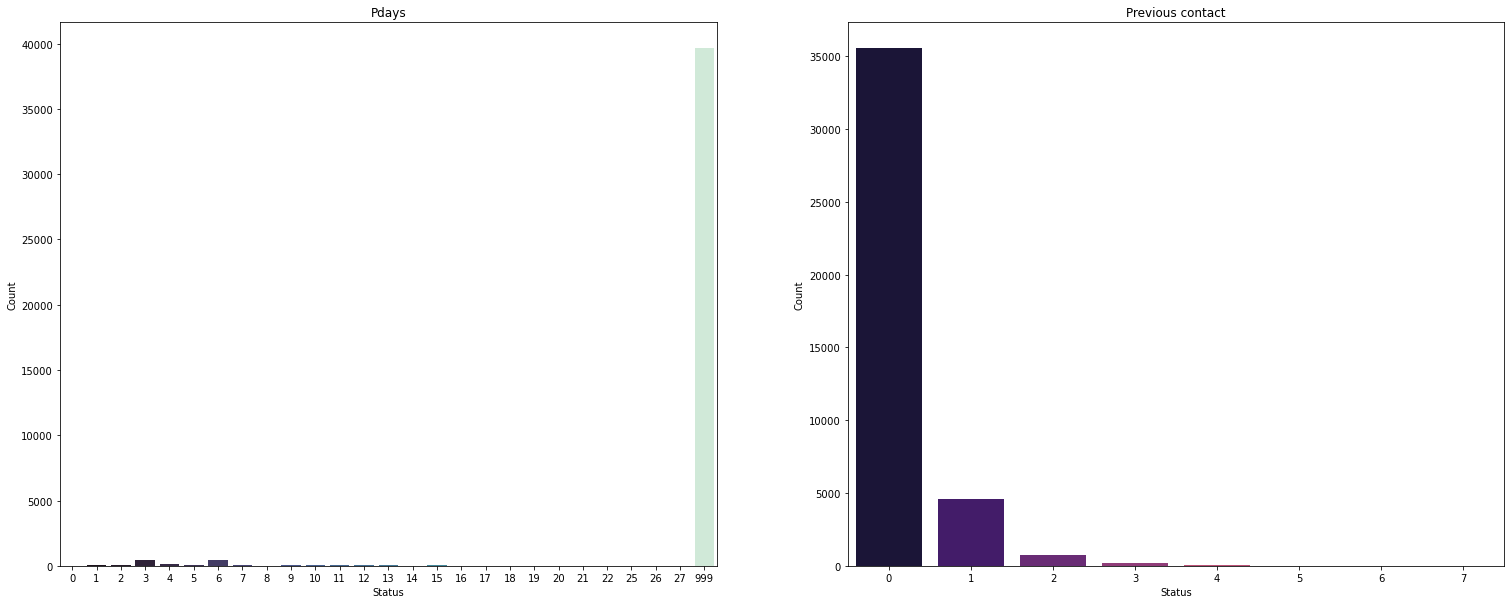

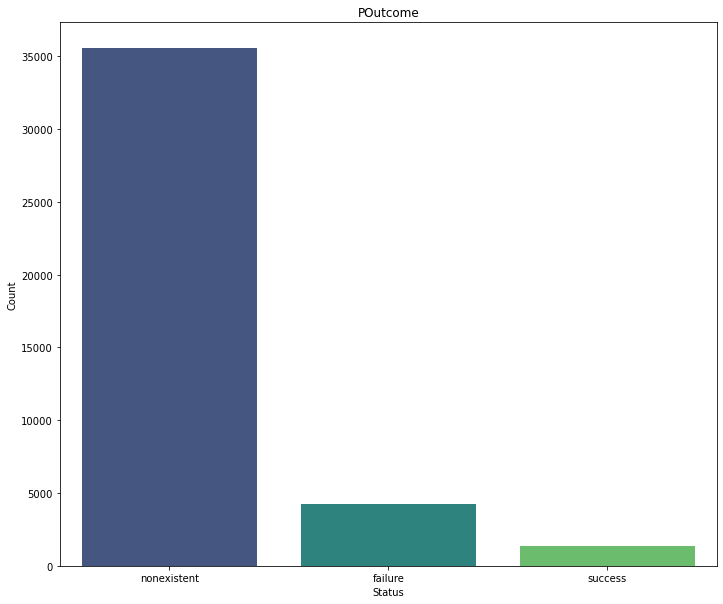

In [27]:
#visualize of customer housing status 
plt.rcParams['figure.figsize'] = (40,10)
plt.subplot(1, 3, 1)
sns.countplot(df['pdays'], palette = 'mako')
plt.title('Pdays', color = 'black')
plt.xlabel('Status')
plt.ylabel('Count')

#visualize of customer loan status based on age
plt.subplot(1, 3, 2)
sns.countplot(df['previous'], palette = 'magma')
plt.title('Previous contact', color = 'black')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

#visualize of customer credit status based on age
plt.subplot(1, 3, 3)
sns.countplot(df['poutcome'], palette = 'viridis')
plt.title('POutcome', color = 'black')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

### I see a problem with too many 999 values which mean the client was no contacted before
### I will replace it with -1 and look at the graph again so I can fix it

In [28]:
df['pdays'] = df['pdays'].replace(999, -1)

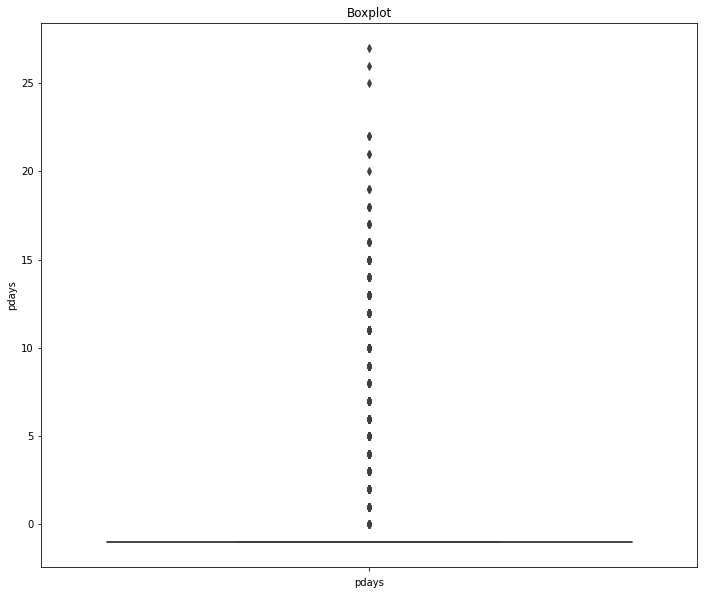

In [29]:
plot_num_values(df, 'pdays')
#looks better

In [30]:
df['pdays'].value_counts()

-1     39664
 3       437
 6       411
 4       118
 9        64
 7        60
 2        60
 12       58
 10       52
 5        46
 13       36
 11       28
 1        26
 15       24
 14       20
 8        18
 0        15
 16       11
 17        8
 18        7
 22        3
 19        3
 21        2
 25        1
 26        1
 27        1
 20        1
Name: pdays, dtype: int64

In [31]:
#we sill have alot of -1 values so it is better to make this a categorical value
#by looking at the values I will use 3 categories and will define the edges as bins
bins = [0, 9, 21, 30]
labels = ['10d', '3w', '>3w']
df['pdays_grp'] = pd.cut(df['pdays'], bins=bins, labels=labels, include_lowest=False)

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,pdays_grp
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN


In [33]:
# I havenot included the -1 value so I will replace the Nan values
# change the dtype as object
df['pdays_grp'] = df['pdays_grp'].astype('O')

# fillna as Not contacted
df['pdays_grp'].fillna('Not contacted', inplace=True)

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,pdays_grp
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted


In [35]:
df['pdays_grp'].value_counts() / len(df)

Not contacted    0.963667
10d              0.030115
3w               0.006072
>3w              0.000146
Name: pdays_grp, dtype: float64

In [36]:
df.drop('pdays', axis=1, inplace=True)

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,pdays_grp
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Not contacted


In [38]:
# add pdays_grp to cat_vars
num_vars.remove('pdays')
catg_vars.append('pdays_grp')

In [39]:
num_vars

['age',
 'duration',
 'campaign',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [40]:
catg_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'pdays_grp']

# In order to check biased information I need to check how each value is distributed across the YES/NO corpora
# I will build a function for this to show Hist graphs for comparison and analysis

In [41]:
# create two groups of yes and no
yes_gr = df[df['y']=='yes']
no_gr = df[df['y']=='no']

print("group_yes' data shape: {}".format(yes_gr.shape))
print("group_no's data shape: {}".format(no_gr.shape))

group_yes' data shape: (4634, 21)
group_no's data shape: (36541, 21)


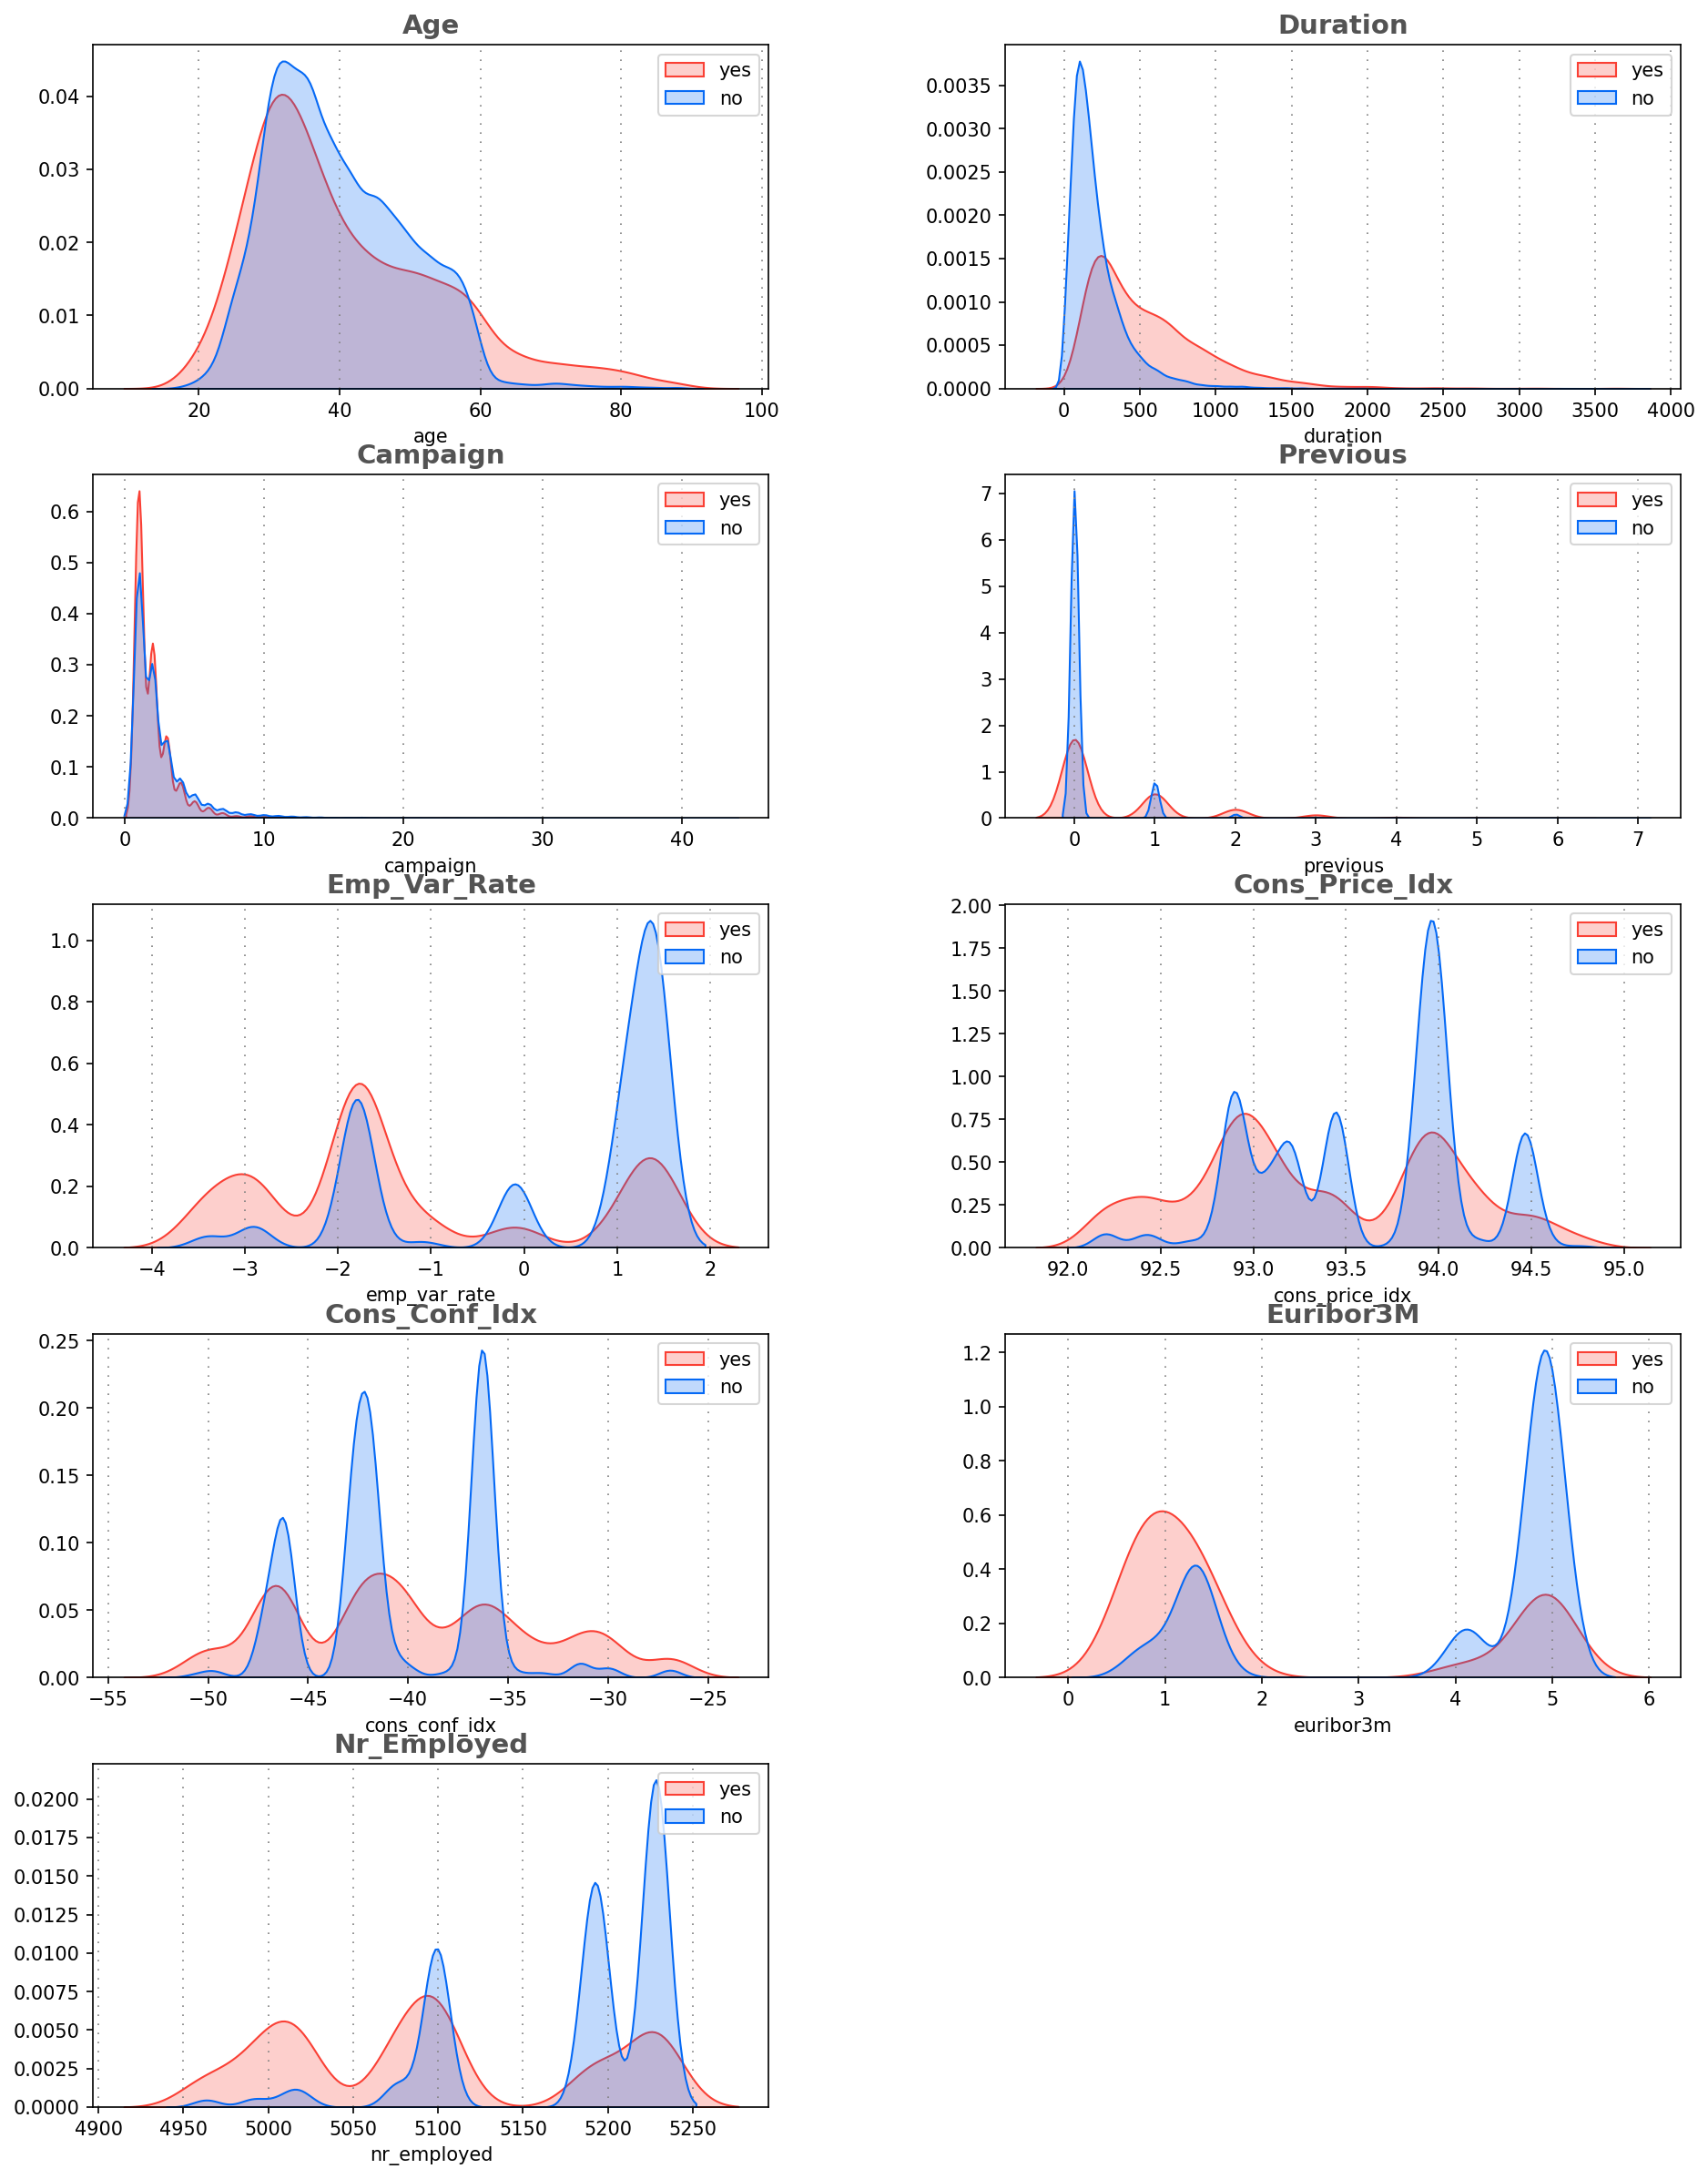

In [42]:
#Lets plot firs the numerical values
background_color = '#ffffff'

fig = plt.figure(figsize=(15,20), dpi=150)
fig.patch.set_facecolor(background_color) # set up background color
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.35, hspace=0.25)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[2,0]),
       fig.add_subplot(gs[2,1]),
       fig.add_subplot(gs[3,0]),
       fig.add_subplot(gs[3,1]),
       fig.add_subplot(gs[4,0])]

#Function to create hist plots
def HistPlot(df, var, ax):    
    # create histograms
    sns.kdeplot(yes_gr[var], ax=ax, color='#FA4035', shade=True, label='yes')
    sns.kdeplot(no_gr[var], ax=ax, color='#0569f5', shade=True, label='no')
    ax.grid(which='major', color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
    ax.set_title(f'{var}'.title(), fontsize=14, fontweight='bold', 
                fontfamily='DejaVu Sans', color='#535353', loc='center')
    ax.legend(loc=1)
    ax.set_ylabel('')
    

for ax, var in zip(axes, num_vars):
    HistPlot(df, var, ax)
    

## The graphs show that the categories that have correlation according to the heatmap are in different distributions and levels according to the target labels, so we will keep them all.

In [43]:
#now lets plot the categorical ones,
#first I will divide in 2 groups the categorical values according to their type
target = 'y'

# create two lists of categorical variables
first_catg = ['job', 'marital', 'education', 'default', 'housing', 'loan']
second_catg = ['contact', 'month', 'day_of_week', 'poutcome','pdays_grp']

In [44]:
# visuzalitions libraries
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
def barPerc(df, variable, ax):
    """ 
    source: https://stackoverflow.com/a/67076347/4852724
    
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                             pandas bar plot)
    """
    
    # 1. How many X categories
    ## check for NaN and remove
    numX = len([x for x in df[variable].unique() if x==x])
    
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##     [0, 8, 16, 24] are hue bars for 1st X category
        hueBars = bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                   bar.get_height() - 0.1 * bar.get_height(),
                   f"{bar.get_height()/total:.2%}",
                   ha='center', va='top', color='black')

def GrpSubplot(df, variable, ax, axis=None, ticklabels=None):
    """ Create subplots based on X variables"""
    
    df.groupby([variable, target]).size().unstack(target).apply(lambda x: x*100/x.sum(), axis=axis).plot.bar(rot=0,
                                                                                                            width=0.9,
                                                                                                             alpha=0.65,
                                                                                                            color=['#67a9cf','#FA4035'],
                                                                                                            ax=ax);
    ax.set_title(f'{variable}'.title(), fontsize=14, fontweight='bold', fontfamily='serif', color='#323232', loc='left')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xticklabels(ticklabels, rotation=90)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.legend(loc=1)
    ax.set_xlabel('')
    
    barPerc(df, variable, ax)

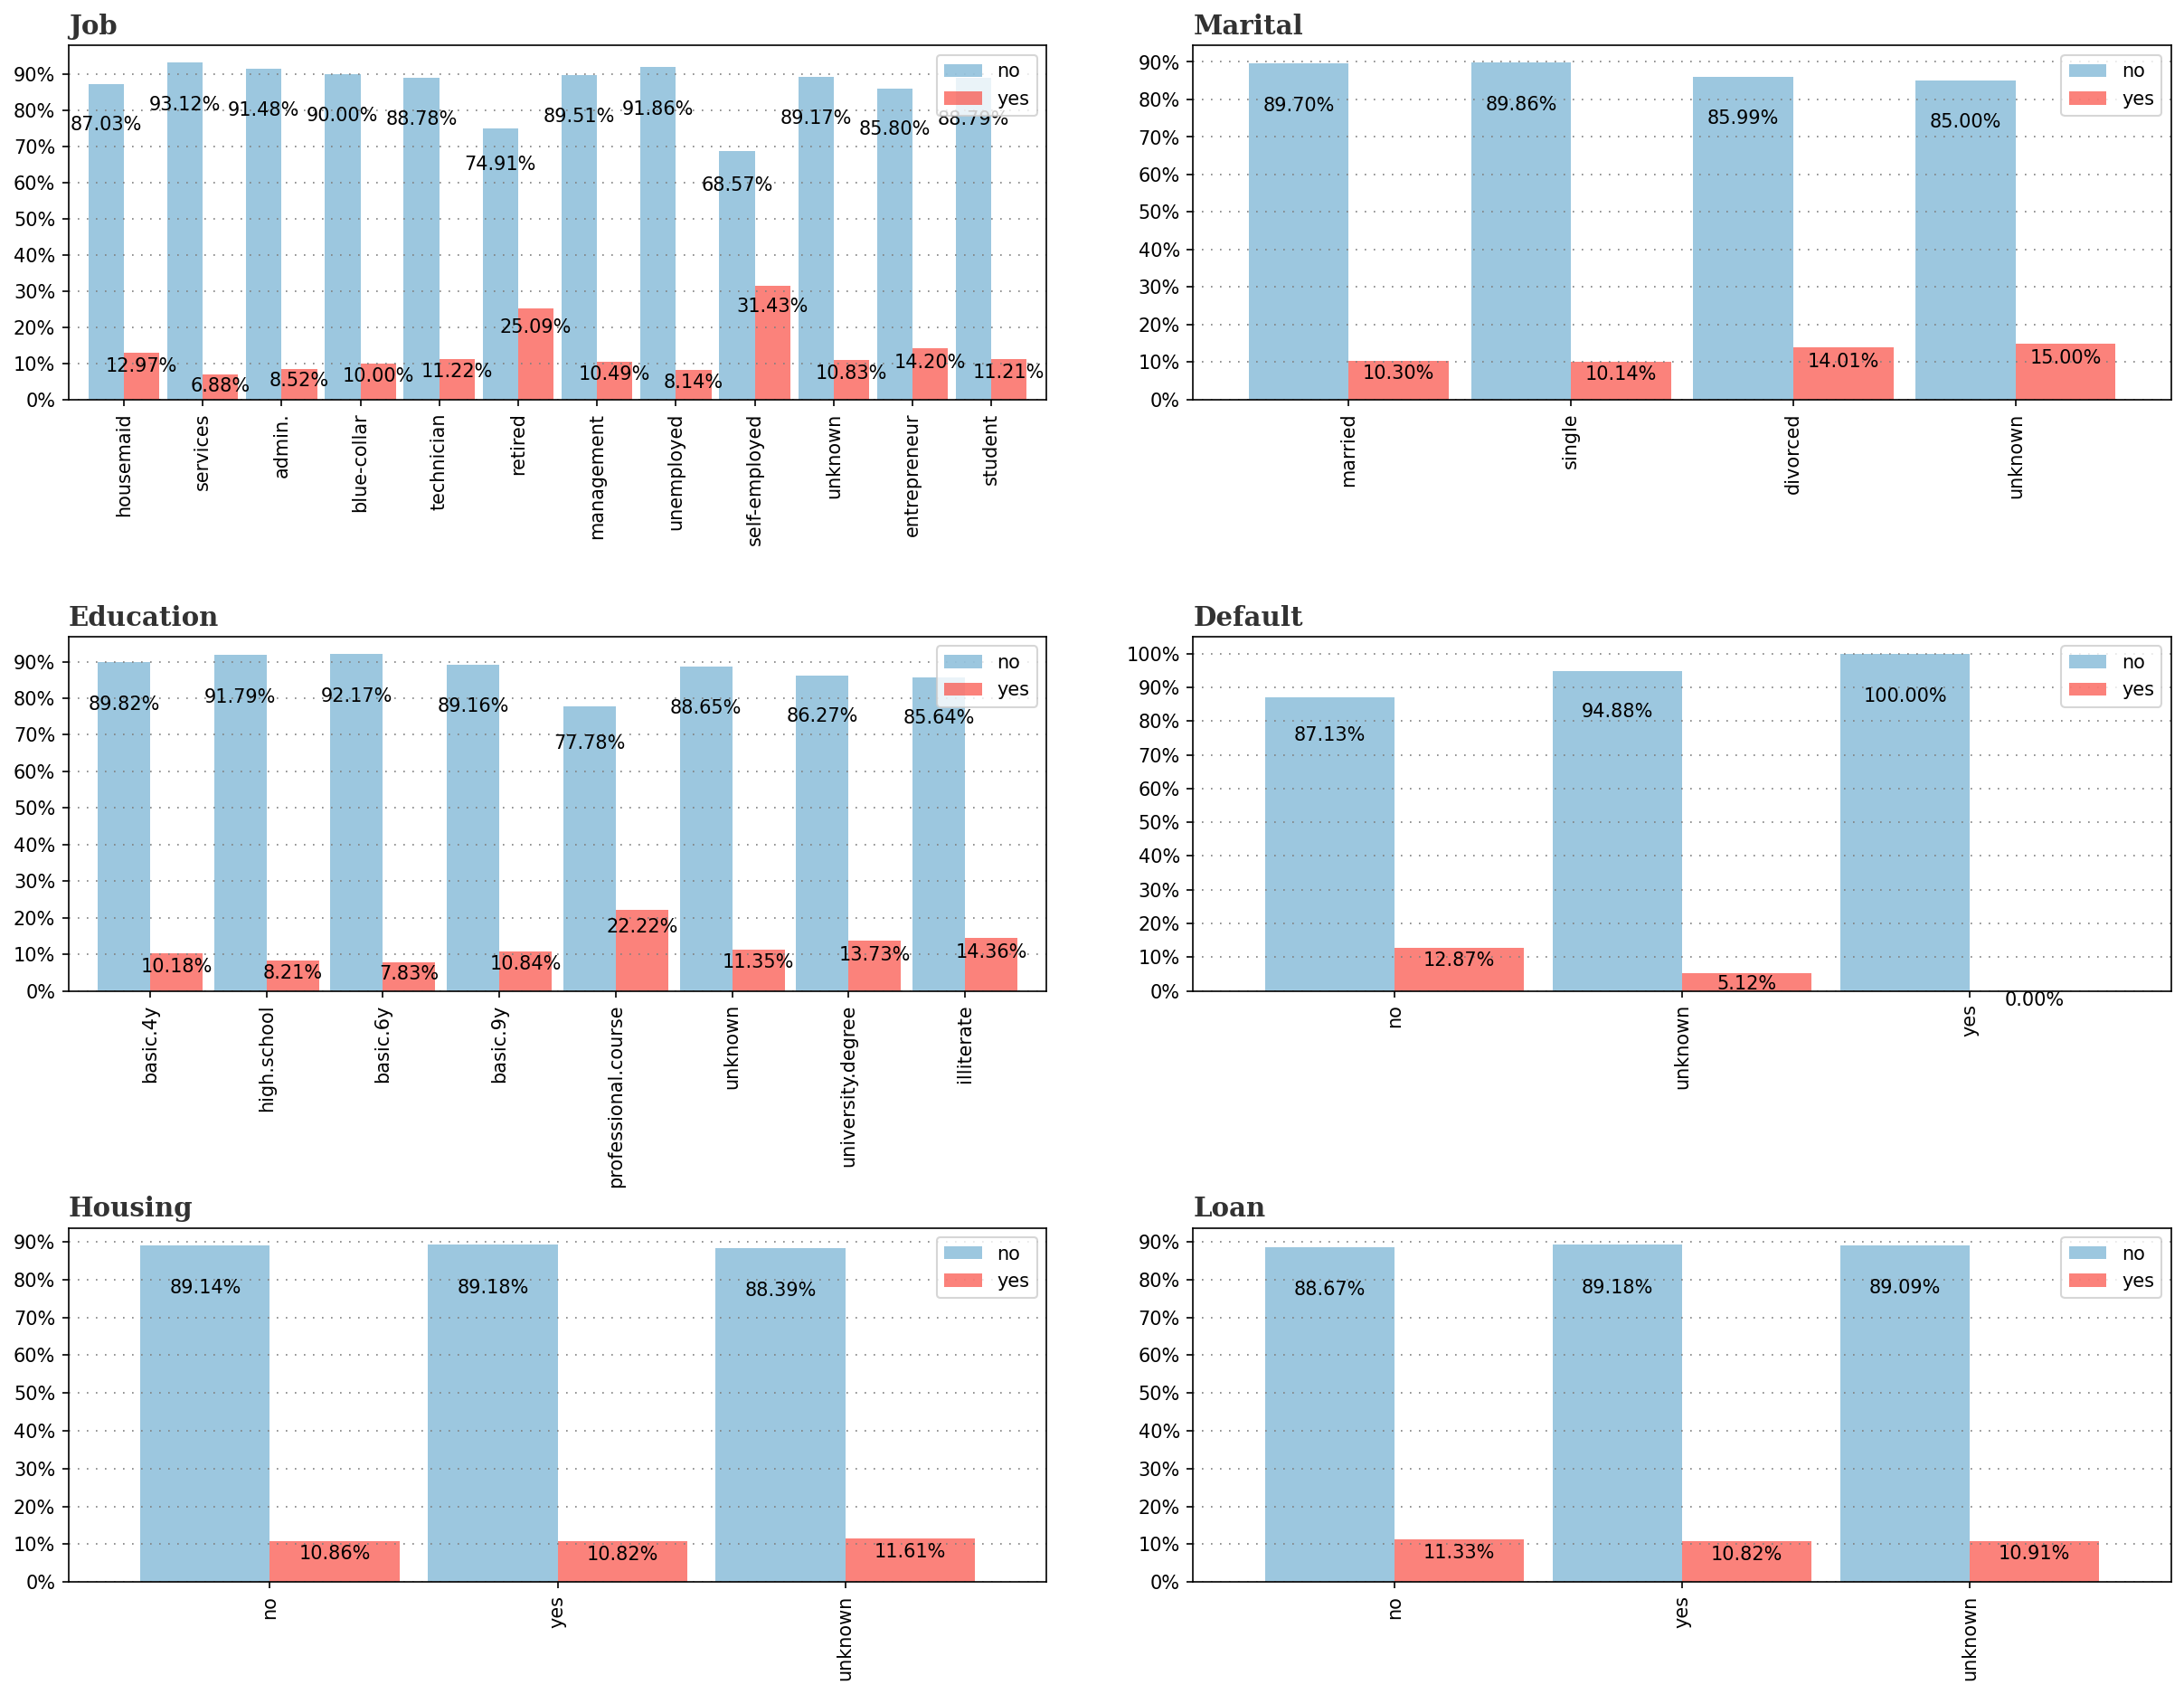

In [45]:
fig = plt.figure(figsize=(20, 15), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.15, hspace=0.67)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[2,0]),
       fig.add_subplot(gs[2,1])]

# ticklabels as list
tlabs = [['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 
          'unemployed', 'self-employed', 'unknown', 'entrepreneur', 
          'student']] + [['married', 'single', 'divorced', 'unknown']] + [['basic.4y', 
    'high.school', 'basic.6y', 'basic.9y', 'professional.course','unknown', 'university.degree', 
    'illiterate']] + [['no', 'unknown', 'yes']] + [['no', 'yes', 'unknown']]*2 

        
for ax, variable, ticklabels in zip(axes, first_catg, tlabs):
    GrpSubplot(df, variable, ax, axis=1, ticklabels=ticklabels)
    

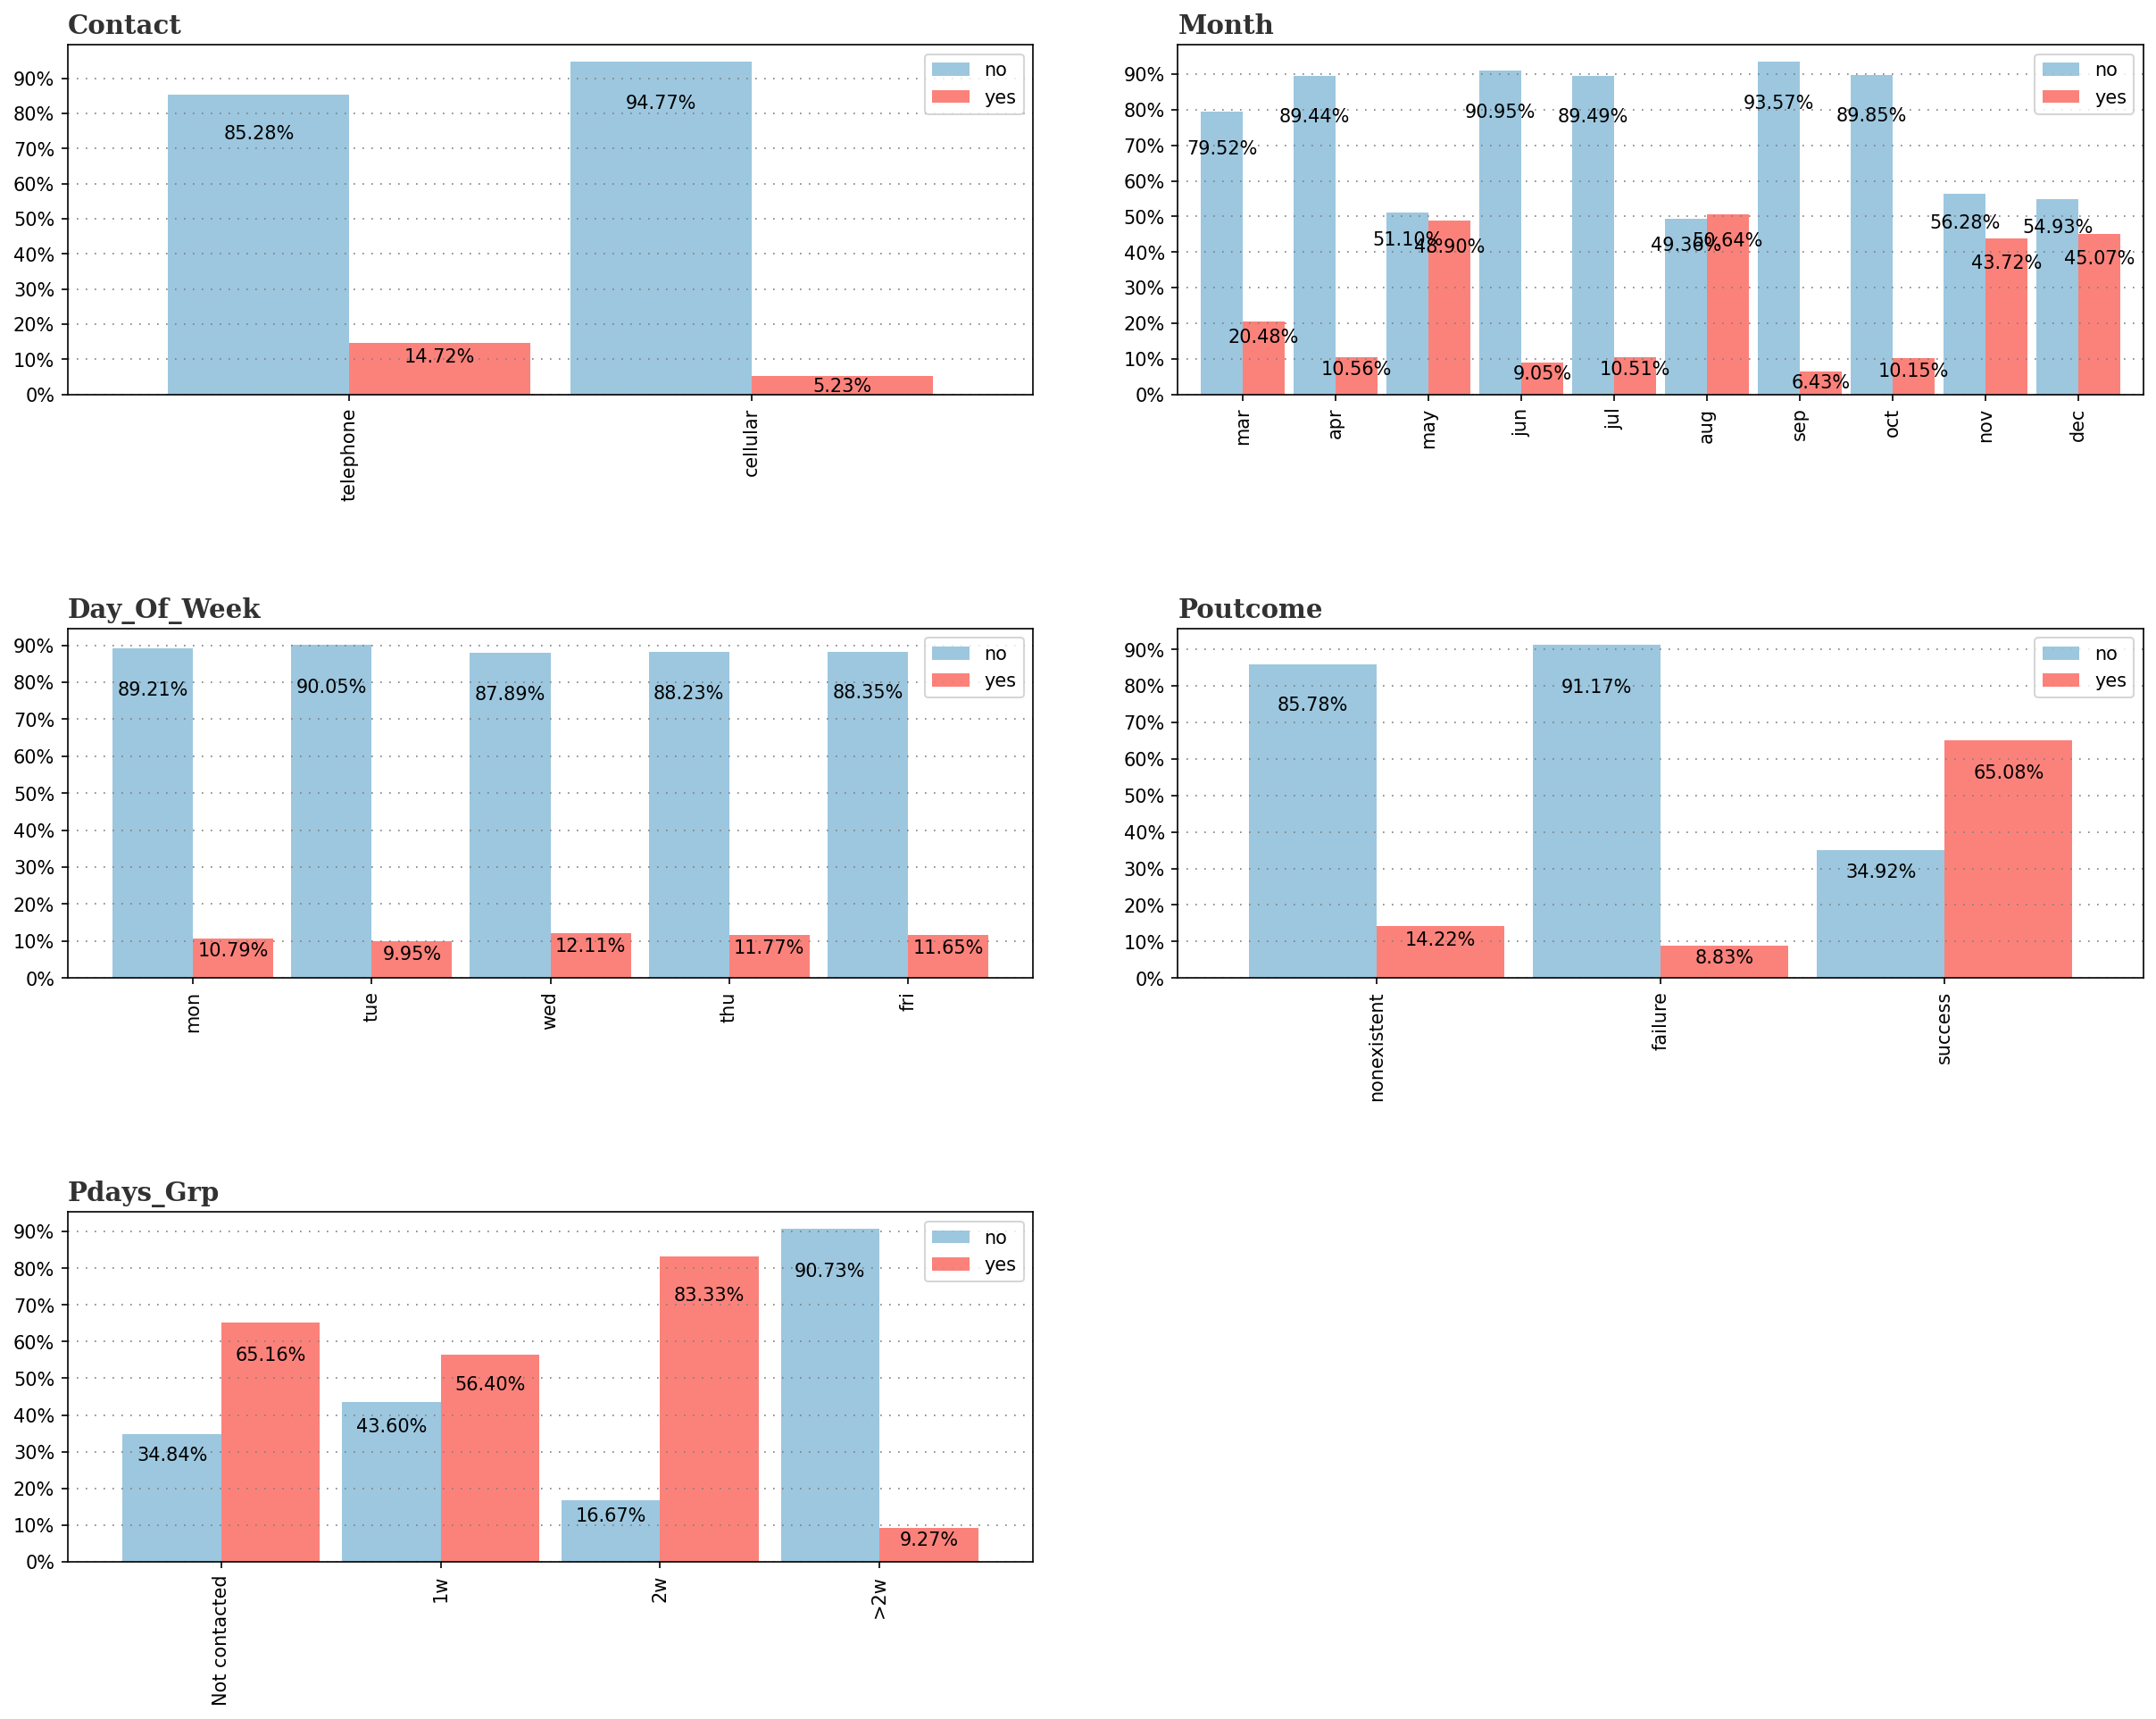

In [46]:
fig = plt.figure(figsize=(20, 15), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.15, hspace=0.67)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[2,0])]
     

# ticklabels as list
tlabs = [['telephone', 'cellular']] + [['mar', 'apr', 'may', 'jun','jul', 'aug', 'sep', 'oct', 'nov', 'dec']] + [['mon', 'tue', 'wed', 'thu', 'fri']] + [['nonexistent','failure', 'success']]+
                [['Not contacted', '1w', '2w', '>2w']]
        
for ax, variable, ticklabels in zip(axes, second_catg, tlabs):
    GrpSubplot(df, variable, ax, axis=1, ticklabels=ticklabels)

# Since we have an imbalanced dataset I will try to implement a hybrid algorithm for training. According to the research paper CatBoost outperforms the others, so I will try with this one.~

In [47]:
#first we have to drop duration column since it is used only for benchamrking and it is recomended to remove for learning purposes
df.drop('duration', axis=1, inplace=True)
df.shape


(41175, 20)

In [48]:
num_vars.remove('duration')

### Replace the target label y with numerical values of 0,1

In [49]:
df = df.replace({'y' :
                                            {'yes' : 1,
                                             'no' : 0}})


In [50]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41175, dtype: int64

### Spliting the train and test set to 70-30 ratio

In [74]:
# separate train and test set
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('y', axis=1),
    df['y'],
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape

((28822, 19), (12353, 19))

In [52]:
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
pdays_grp         0
dtype: int64

In [53]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
pdays_grp          object
dtype: object

In [54]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
pdays_grp          object
dtype: object

In [55]:
X_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
pdays_grp         0
dtype: int64

In [56]:
# Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_vars] = sc.fit_transform(X_train[num_vars])
X_test[num_vars] = sc.fit_transform(X_test[num_vars])

In [57]:
# Collecting 'Column Indexes' of all the Categorical Columns in X_train
categorical_features_indices = np.where(X_train.dtypes == np.object)[0]

# Printing Categorical Features
categorical_features_indices

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 18])

In [58]:
# Initialising Base CatBoost Model
import catboost
# 1. Base Model
cb = catboost.CatBoostClassifier(loss_function='Logloss',
                         eval_metric='Logloss',
                         boosting_type='Ordered', # use permutations
                         random_seed=2405, 
                         use_best_model=True,
                         one_hot_max_size = 6,
                         silent=True)



# 2. Fitting the Model
cb.fit(X_train,y_train,cat_features=categorical_features_indices, eval_set=(X_test, y_test))

# 3. Initial Prediction of Results
y_pred = cb.predict(X_test)

# 4. Predicting Probabilites
y_pred_proba = cb.predict_proba(X_test)

# 5. Printing Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10918
           1       0.70      0.25      0.37      1435

    accuracy                           0.90     12353
   macro avg       0.80      0.62      0.66     12353
weighted avg       0.88      0.90      0.88     12353



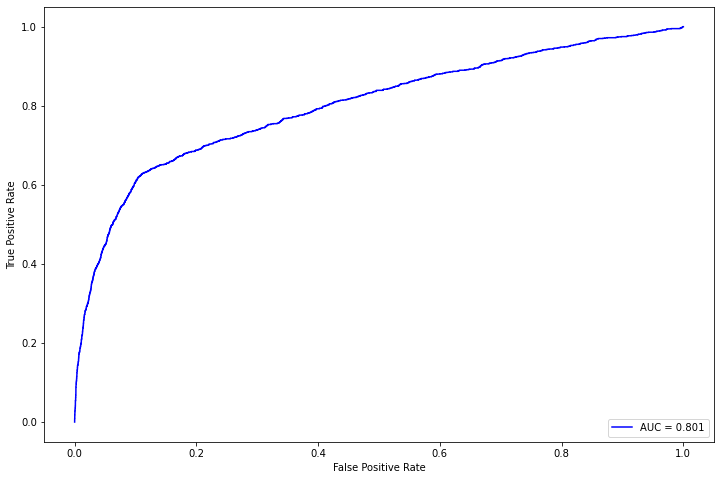

In [64]:
# Printing ROC-AUC score
from sklearn import metrics
metrics.roc_auc_score(y_test,y_pred_proba[:,1])

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba[:,1],pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
# Making the Final CatBoost model
cb_final = catboost.CatBoostClassifier(
                         loss_function='Logloss',
                         eval_metric='Logloss',
                         boosting_type='Ordered', # use permutations
                         random_seed=2405, 
                         use_best_model=True,
                         one_hot_max_size = 5,
                         silent=True,
                         depth = 7,
                         iterations = 300,
                         learning_rate = 0.03, 
                         l2_leaf_reg = 5,
                         border_count = 5
                        )

In [66]:
cb_final.fit(X_train,y_train,cat_features=categorical_features_indices, eval_set=(X_test, y_test))

# Final Prediction of Results
y_pred = cb_final.predict(X_test)

# Final Prediction of Probabilities
y_pred_proba = cb_final.predict_proba(X_test)

# Printing Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10918
           1       0.70      0.21      0.33      1435

    accuracy                           0.90     12353
   macro avg       0.81      0.60      0.64     12353
weighted avg       0.88      0.90      0.87     12353



In [72]:
# Changing parameters to improve eval metrics
cb_final2 = catboost.CatBoostClassifier(
                         loss_function='MultiClass',
                         eval_metric='MultiClass',
                         boosting_type='Ordered',
                         random_seed=2405, 
                         use_best_model=True,
                         one_hot_max_size = 10,
                         silent=True,
                         depth = 5,
                         iterations = 500,
                         learning_rate = 0.03, 
                         l2_leaf_reg = 5,
                         border_count = 5
                        )

In [73]:
cb_final2.fit(X_train,y_train,cat_features=categorical_features_indices, eval_set=(X_test, y_test))

# Final Prediction of Results
y_pred = cb_final.predict(X_test)

# Final Prediction of Probabilities
y_pred_proba = cb_final.predict_proba(X_test)

# Printing Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10918
           1       0.70      0.21      0.33      1435

    accuracy                           0.90     12353
   macro avg       0.81      0.60      0.64     12353
weighted avg       0.88      0.90      0.87     12353



# We can keep trying different parameters but with these three the best one is the first one